# Topic

Describe the operation of the Miller-Rabin primality test and implement it. In the case where
this test returns <b>FALSE</b>, we are certain that the given number is composite – explain why.
Present the operation of the Miller-Rabin test on randomly generated numbers not smaller
than 105
(use the built-in function for generating pseudorandom numbers). Perform
this test enough times so that the probability of error is less than 10⁻⁶. Perform the examples
using the SageMath program. You can find some information on this topic in section 2.4 of the book https://wstein.org/ent/ent.pdf

In [ ]:
DEFAULT_NUMBER_BOUND = (105, 10**6)
DEFAULT_TESTS = 10
DEFAULT_MAX_PROBABILITY = 10^-6

## Side Code

In [ ]:
import sys
import matplotlib.pyplot as plt
from ipywidgets import interactive
import ipywidgets as widgets
from IPython.display import display
import numpy as np

## What is Miller-Rabin Test?

The Miller–Rabin algorithm is a probabilistic primality test used to check whether a given integer n > 2 is likely to be prime. Unlike deterministic methods (e.g., trial division by all possible divisors), MR allows for very fast rejection of composite numbers with very high probability.

### General idea

1. For an odd number `n`, write `n - 1` in the form:

   $$
   n - 1 = 2^r\cdot d,\quad d\text{  is odd}.
   $$
   
2. Choose a random base `a` from the interval [2, n - 2] and compute:

   $$
   x = a^d mod n
   $$
   
3. If `x == 1` or `x == n - 1`, we consider that `a` does not disprove the primality of `n` and proceed to the next round.  
4. Otherwise, perform **s - 1** iterations:  
   - x = x^2 mod n  
   - If x == n - 1, we consider the round safe and continue.  
5. If in none of the steps x reaches the value n - 1, then `a` is a witness to compositeness and `n` is composite.

We repeat the test for **k** different random bases. If no round detects compositeness, we consider `n` to be **probably prime**.

---

## Implementation

### Miller-Rabin Test

#### SageMath

In [ ]:
def millerRabinTest(n, k=DEFAULT_NUMBER_BOUND):
    """
    Miller–Rabin strong primality test:
    - n: number to be tested
    - k: number of rounds (the more, the lower the probability of error)
    Returns True if n is probably prime; False if compositeness is detected.
    """
    n = Integer(n)
    # 1) Simple cases
    if n < 2:
        return False         # everything < 2 is not prime
    if n in [2, 3]:
        return True          # 2 and 3 are prime
    if n % 2 == 0:
        return False         # even numbers > 2 are composite

    # 2) Decompose n-1 = 2^r * d
    r = (n-1).valuation(2)
    d = (n-1) // 2^r

    # 3) Run the test k times
    for _ in range(k):
        a = randint(2, n - 2)    # random base a ∈ [2, n-2]
        x = power_mod(a, d, n)   # a^d mod n (modular exponentiation)

        # 4) If immediately 1 or n-1, base does not disprove primality
        if x == 1 or x == n - 1:
            continue

        # 5) Check subsequent squares:
        #    Repeat r-1 times: x = x^2 mod n.
        #    If x ever becomes n-1, this base passes the test.
        for _ in range(r - 1):
            x = power_mod(x, 2, n)
            if x == n - 1:
                break
        else:
            # loop finished without break → witness of compositeness
            return False
        
    return True


#### Python

In [ ]:
from random import randint

def millerRabinTestPython(n, k=DEFAULT_NUMBER_BOUND):
    # 1) Handle small and even numbers
    if n < 2:
        return False         # everything < 2 is not prime
    if n in (2, 3):
        return True          # 2 and 3 are prime
    if n % 2 == 0:
        return False         # all other even numbers are composite

    # 2) Decompose n-1 = 2^r * d, with odd d
    r, d = 0, n - 1
    while d % 2 == 0:
        d //= 2
        r += 1
    # now n-1 = 2^r * d

    # 3) Run the test k times
    for _ in range(k):
        a = randint(2, n - 2)    # random base a ∈ [2, n-2]
        x = pow(a, d, n)         # a^d mod n (built-in modular exponentiation)

        # 4) If immediately 1 or n-1, base does not disprove primality
        if x == 1 or x == n - 1:
            continue

        # 5) Check subsequent squares:
        #    Repeat r-1 times: x = x^2 mod n.
        #    If x ever becomes n-1, this base passes the test.
        for _ in range(r - 1):
            x = pow(x, 2, n)
            if x == n - 1:
                break
        else:
            # loop completed without break → witness of compositeness
            return False

    # 6) If no base detected compositeness → probably prime
    return True


### Miller-Rabin Test Probability
The probability is the number of bases that can reveal compositeness divided by the total number of possible bases in the range [2, n - 2], so there are n - 3 possible bases.

<b>[TODO] Explain what this code does</b>


In [ ]:
def probabilityOfMillerRabinTest(number, tests):
  if (number < 2): raise ValueError("number can't be less then 3")
  factors = [a for a, _ in factor(number)]
  probability = len(factors)/((number - 2)**tests)
  return probability

In [ ]:
def testsOfMillerRabinTestToSatisfyProbability(number, probability):
  factors = [a for a, _ in factor(number)]
  tests = math.log(len(factors) / probability) / math.log(number - 2)
  return math.ceil(tests)

<b>[TODO] explain this estimations</b>

In [ ]:
def estimatedProbabilityForMillerRabinTest(tests):
  return (1/4)**tests

In [ ]:
def estimatedTestForMillerRabinTestToSatisfyProbability(probability):
    if not (0 < probability < 1): raise ValueError("probability must be is (0,1)")
    tests = math.log(1/probability, 4)
    return math.ceil(tests)

## Random Number Test

In [ ]:
NUMBER = randint(DEFAULT_NUMBER_BOUND[0], DEFAULT_NUMBER_BOUND[1])
TESTS = DEFAULT_TESTS
PROBABILITY = DEFAULT_MAX_PROBABILITY

### Test if number is prime

In [ ]:
print("Number:", NUMBER)
print("Tests:", TESTS)

result = millerRabinTest(NUMBER, TESTS)
print("Is Prime?:", result)

Number: 487832
Tests: 10
Is Prime?: False


### Calculate probability for number and tests

In [ ]:
probability = probabilityOfMillerRabinTest(NUMBER, TESTS)
estimated_probability = estimatedProbabilityForMillerRabinTest(TESTS)

print("Probability:" ,N(probability))
print("Estimated probability:" , N(estimated_probability))
print("Is probability less then estimated?", probability < estimated_probability)

Probability: 3.93039509713419e-57
Estimated probability: 9.53674316406250e-7
Is probability less then estimated? True


### Calculate tests for number and probability

In [ ]:
tests = testsOfMillerRabinTestToSatisfyProbability(NUMBER, PROBABILITY)
estimated_tests = estimatedTestForMillerRabinTestToSatisfyProbability(PROBABILITY)
print("Tests:", tests)
print("Estimated Tests:", estimated_tests)
print("Are tests less then estimated tests?", tests < estimated_tests)

Tests: 2
Estimated Tests: 10
Are tests less then estimated tests? True


## Chart of that number is prime by tests

In [ ]:
NUMBER_BOUND = (4, 100000)       # e.g. from 2 to 100000
NUMBER_STEP  = 5000             # every 5000 numbers
TESTS_BOUND  = (1, 20)          # from 1 to 20 tests
TESTS_STEP   = 1
PROBABILITY_BOUND = (1e-12, 1e-6)  # probability range
PROBABILITY_STEP  = 2e-7           # step of 0.0000002
TESTS = 5       # example number of tests (for the top plots)
PROBABILITY = 1e-9  # target probability (for the top plots)

### Calculate Data and drawGraph function

In [ ]:
# --- Data generation #1: For each n in [4..100000], step 5000
number       = list(range(NUMBER_BOUND[0], NUMBER_BOUND[1] + 1, NUMBER_STEP))
probability  = [probabilityOfMillerRabinTest(n, TESTS) for n in number]
tests_needed = [testsOfMillerRabinTestToSatisfyProbability(n, PROBABILITY) for n in number]

# --- Data generation #2: For each target probability in [1e-12..1e-6], step 2e-7
probability_values = np.arange(
    PROBABILITY_BOUND[0],
    PROBABILITY_BOUND[1] + PROBABILITY_STEP,
    PROBABILITY_STEP
)
estimated_tests   = [
    estimatedTestForMillerRabinTestToSatisfyProbability(p)
    for p in probability_values
]

# --- Data generation #3: For each t in [1..20]
test_values           = list(range(TESTS_BOUND[0], TESTS_BOUND[1] + 1, TESTS_STEP))
estimated_probabilities = [
    estimatedProbabilityForMillerRabinTest(t)
    for t in test_values
]


In [ ]:
def drawGraph():
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    axes[0, 0].plot(number, probability, marker='o', linestyle='-', color='blue')
    axes[0, 0].set_title(f"Probability for Number in {TESTS} tests of Miller-Rabin Test")
    axes[0, 0].set_xlabel("Number")
    axes[0, 0].set_ylabel("Probability")
    axes[0, 0].grid(True)

    axes[0, 1].plot(number, tests_needed, marker='o', linestyle='-', color='green')
    axes[0, 1].set_title(f"Tests for Number of Miller-Rabin that satisfy {PROBABILITY} probability")
    axes[0, 1].set_xlabel("Number")
    axes[0, 1].set_ylabel("Tests needed")
    axes[0, 1].grid(True)

    axes[1, 0].plot(test_values, estimated_probabilities, marker='o', linestyle='-', color='red')
    axes[1, 0].set_title("Estimated Probability for Tests of Miller-Rabin Test")
    axes[1, 0].set_xlabel("Number of Tests")
    axes[1, 0].set_ylabel("Estimated Probability")
    axes[1, 0].grid(True)

    axes[1, 1].plot(probability_values, estimated_tests, marker='o', linestyle='-', color='purple')
    axes[1, 1].set_title("Estimated Tests vs. Probability")
    axes[1, 1].set_xlabel("Target Probability")
    axes[1, 1].set_ylabel("Estimated Tests")
    axes[1, 1].grid(True)

    plt.tight_layout()
    plt.show()


### Draw Graph


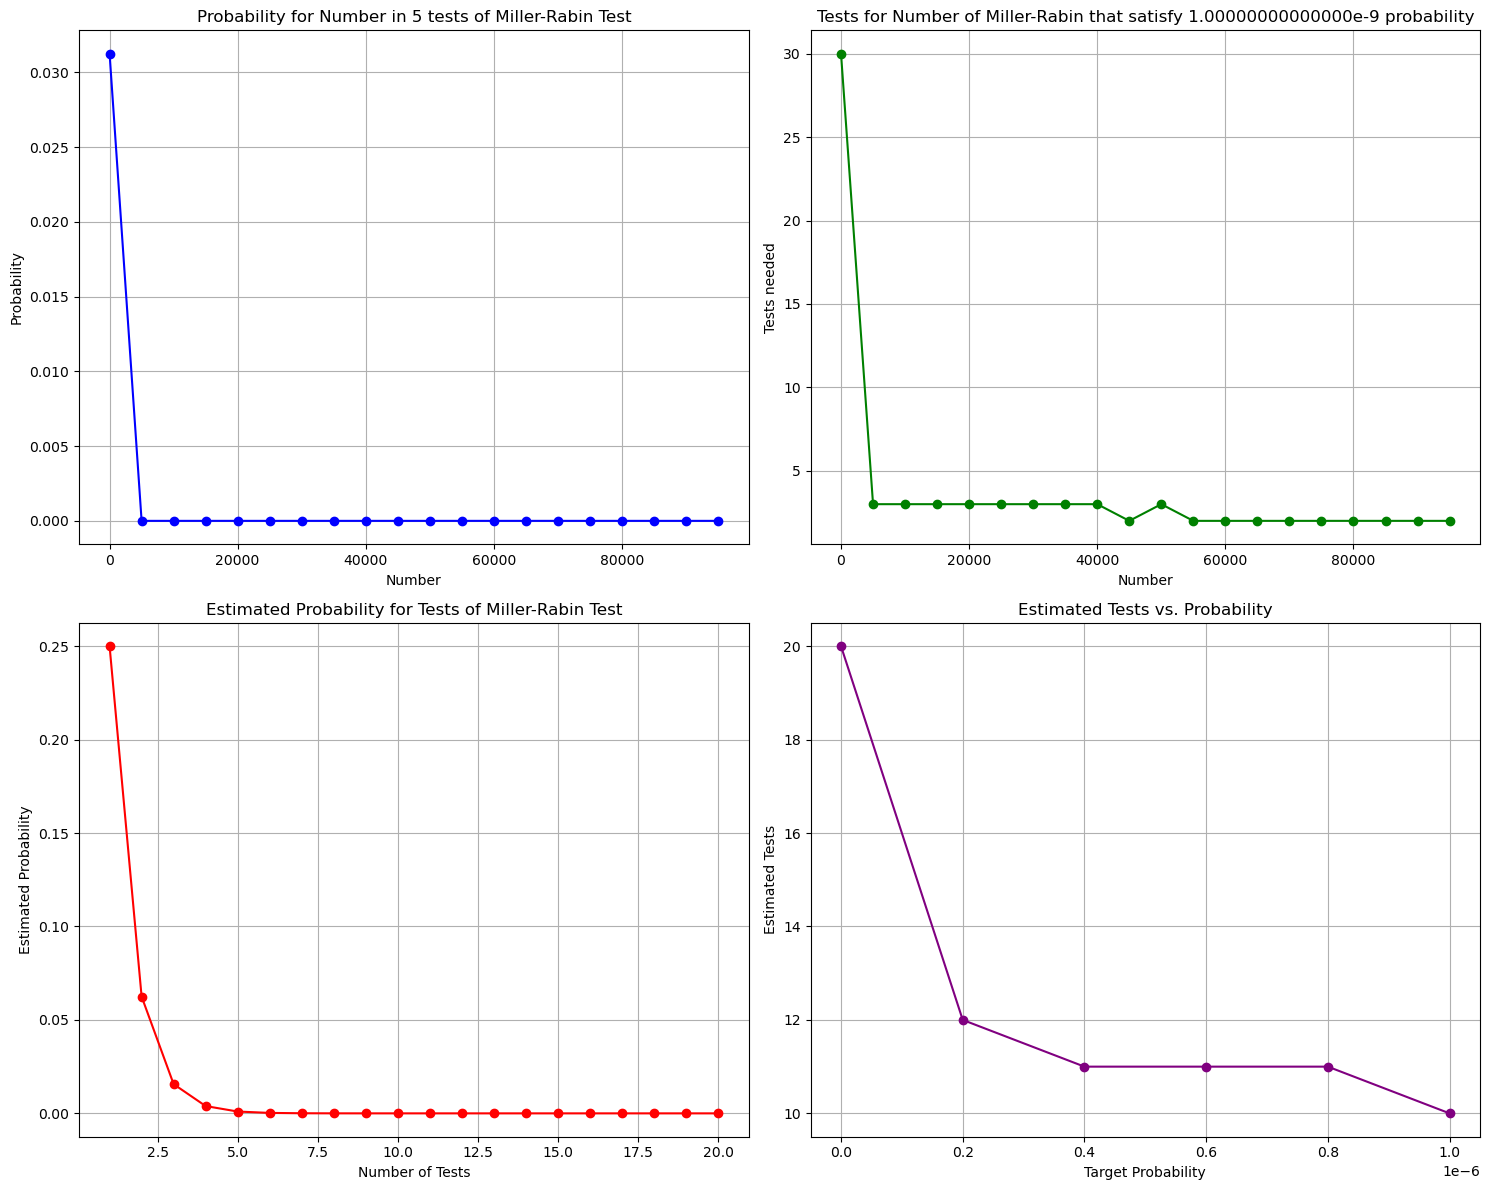

In [ ]:
drawGraph()